In [95]:
import os
from urllib.request import urlopen
import ssl, certifi
import pandas as pd
import plotly.express as px

os.makedirs("../data", exist_ok=True)

ctx = ssl.create_default_context(cafile=certifi.where())

urls = {
    "unvotes":    "https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2021/2021-03-23/unvotes.csv",
    "roll_calls": "https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2021/2021-03-23/roll_calls.csv",
    "issues":     "https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2021/2021-03-23/issues.csv",
}

for name, url in urls.items():
    with urlopen(url, context=ctx) as f:
        df = pd.read_csv(f)
    out_path = f"../data/{name}.csv"
    df.to_csv(out_path, index=False)
    print(f"✅ Saved to {out_path}")

✅ Saved to ../data/unvotes.csv
✅ Saved to ../data/roll_calls.csv
✅ Saved to ../data/issues.csv


In [96]:
unvotes    = pd.read_csv('../data/unvotes.csv')
roll_calls = pd.read_csv('../data/roll_calls.csv')
issues = pd.read_csv('../data/issues.csv')

print(unvotes.head())
print(roll_calls.head())
print(issues.head())

   rcid             country country_code vote
0     3       United States           US  yes
1     3              Canada           CA   no
2     3                Cuba           CU  yes
3     3               Haiti           HT  yes
4     3  Dominican Republic           DO  yes
   rcid  session  importantvote        date    unres  amend  para  \
0     3        1            0.0  1946-01-01   R/1/66    1.0   0.0   
1     4        1            0.0  1946-01-02   R/1/79    0.0   0.0   
2     5        1            0.0  1946-01-04   R/1/98    0.0   0.0   
3     6        1            0.0  1946-01-04  R/1/107    0.0   0.0   
4     7        1            0.0  1946-01-02  R/1/295    1.0   0.0   

                            short  \
0  AMENDMENTS, RULES OF PROCEDURE   
1      SECURITY COUNCIL ELECTIONS   
2                VOTING PROCEDURE   
3     DECLARATION OF HUMAN RIGHTS   
4      GENERAL ASSEMBLY ELECTIONS   

                                               descr  
0  TO ADOPT A CUBAN AMENDMENT T

## Ultimate outer merge

In [97]:
import pandas as pd

# 1. Load the three CSV files into pandas DataFrames
unvotes    = pd.read_csv('../data/unvotes.csv')
roll_calls = pd.read_csv('../data/roll_calls.csv')
issues = pd.read_csv('../data/issues.csv')
# 2. Perform the outer merge on the three DataFrames using 'rcid' as the key
merged_df = roll_calls.merge(unvotes, on="rcid", how="outer").merge(issues, on="rcid", how="outer")

# 3. Reset index if you want to drop the old index column and get a clean index
merged_df = merged_df.reset_index(drop=True)

# 4. Save the merged DataFrame to a local folder as a CSV file
merged_df.to_csv("merged_data.csv", index=False)

# Optional: You can save it as an Excel or JSON if needed:
# merged_df.to_excel("path/to/save/merged_data.xlsx", index=False)
# merged_df.to_json("path/to/save/merged_data.json", orient="records", lines=True)

print("Merge completed and saved to local folder.")


Merge completed and saved to local folder.


In [98]:
merged_df.columns.unique()

#prove outer merge is completed
merged_df.shape
merged_df.head()


,rcid,session,importantvote,date,unres,amend,para,short,descr,country,country_code,vote,short_name,issue
0,3,1,0.0,1946-01-01,R/1/66,1.0,0.0,"AMENDMENTS, RULES OF PROCEDURE",TO ADOPT A CUBAN AMENDMENT TO THE UK PROPOSAL ...,United States,US,yes,NaN,NaN
1,3,1,0.0,1946-01-01,R/1/66,1.0,0.0,"AMENDMENTS, RULES OF PROCEDURE",TO ADOPT A CUBAN AMENDMENT TO THE UK PROPOSAL ...,Canada,CA,no,NaN,NaN
2,3,1,0.0,1946-01-01,R/1/66,1.0,0.0,"AMENDMENTS, RULES OF PROCEDURE",TO ADOPT A CUBAN AMENDMENT TO THE UK PROPOSAL ...,Cuba,CU,yes,NaN,NaN
3,3,1,0.0,1946-01-01,R/1/66,1.0,0.0,"AMENDMENTS, RULES OF PROCEDURE",TO ADOPT A CUBAN AMENDMENT TO THE UK PROPOSAL ...,Haiti,HT,yes,NaN,NaN
4,3,1,0.0,1946-01-01,R/1/66,1.0,0.0,"AMENDMENTS, RULES OF PROCEDURE",TO ADOPT A CUBAN AMENDMENT TO THE UK PROPOSAL ...,Dominican Republic,DO,yes,NaN,NaN


## Question: "How do different regions vote on the key issue (Human Rights) in the UN, and have there been any noticeable shifts in voting behavior over time?"

### Show not all countries have country_code

In [99]:
# Filter rows where country_code is missing (NaN)
missing_country_code = merged_df[merged_df["country_code"].isna()]

# Get unique countries where country_code is missing
unique_countries_with_missing_code = missing_country_code['country'].unique()

# Display the result
print(unique_countries_with_missing_code)

['Yemen Arab Republic' 'Zanzibar' 'Federal Republic of Germany' 'Namibia']


Notes: 
Remove session cause each session refers to one year, 1 = 1946
Remove para. Because it is only on a paragraph and not a resolution. And it stops at 1985, which falls out of the date region we are trying to visualise
Same for amend
Remove unres. Because its a unique key as RCID and less sophisticated
Remove describe. Because every single line is unique and its very hard to filter out the info

Convert date to datetime. Then, extract the year from it\
The reason why we remove session and kept year is cause we can visualise it better
Countr_code. Not all countries have country_code hence there will be NA values. So we drop it 

Dont need short name as it is exactly the same as issue 


In [100]:
print(merged_df['short_name'].unique())
print(merged_df['issue'].unique())

[nan 'hr' 'ec' 'co' 'me' 'di' 'nu']
[nan 'Human rights' 'Economic development' 'Colonialism'
 'Palestinian conflict' 'Arms control and disarmament'
 'Nuclear weapons and nuclear material']


In [101]:
merged_df.columns.unique()

Index(['rcid', 'session', 'importantvote', 'date', 'unres', 'amend', 'para',
       'short', 'descr', 'country', 'country_code', 'vote', 'short_name',
       'issue'],
      dtype='object')

In [102]:
#Pick only the columns we need
final_df = merged_df[['rcid', 'date', 'country', 'vote', 'issue', 'importantvote', 'short']].copy()
print(final_df.tail())

         rcid        date    country     vote issue  importantvote  \
1123329  9147  2019-12-10    Uruguay      yes   NaN            NaN   
1123330  9147  2019-12-10    Vanuatu      yes   NaN            NaN   
1123331  9147  2019-12-10  Venezuela  abstain   NaN            NaN   
1123332  9147  2019-12-10    Vietnam      yes   NaN            NaN   
1123333  9147  2019-12-10     Zambia      yes   NaN            NaN   

                                  short  
1123329  Oceans and the law of the sea   
1123330  Oceans and the law of the sea   
1123331  Oceans and the law of the sea   
1123332  Oceans and the law of the sea   
1123333  Oceans and the law of the sea   


In [103]:
print(final_df['issue'].nunique())
print(final_df['issue'].unique())
print(final_df['short'].nunique())

#therefore both of them are different and we cant merge inner 


6
[nan 'Human rights' 'Economic development' 'Colonialism'
 'Palestinian conflict' 'Arms control and disarmament'
 'Nuclear weapons and nuclear material']
2020


In [104]:
# 3. Reset index if you want to drop the old index column and get a clean index
final_df = final_df.reset_index(drop=True)

# 4. Save the merged DataFrame to a local folder as a CSV file
final_df.to_csv("final_merged_data.csv", index=False)

### Extract only year for date (using datetime)

In [105]:
final_df['date'] = pd.to_datetime(final_df['date']).dt.year
# sort values by date
final_df = final_df.sort_values(by='date')
print(final_df.tail())

         rcid  date               country     vote issue  importantvote  \
1107298  9087  2019  Bosnia & Herzegovina       no   NaN            NaN   
1107297  9087  2019               Bolivia  abstain   NaN            NaN   
1107296  9087  2019                Bhutan      yes   NaN            NaN   
1107305  9087  2019              Cambodia      yes   NaN            NaN   
1123333  9147  2019                Zambia      yes   NaN            NaN   

                                                     short  
1107298  Countering the use of information and communic...  
1107297  Countering the use of information and communic...  
1107296  Countering the use of information and communic...  
1107305  Countering the use of information and communic...  
1123333                     Oceans and the law of the sea   


### From here on we will only do cold war

In [131]:
#Filter out dates for cold war which occured from 1947 to 1991
cold_war_df = final_df[(final_df['date'] >= 1947) & (final_df['date'] <= 1991)].copy()
print(cold_war_df['date'].min(), cold_war_df['date'].max())
print(cold_war_df.tail())

1947 1991
        rcid  date      country vote                 issue  importantvote  \
547800  3620  1991       Kuwait  yes  Palestinian conflict            0.0   
547799  3620  1991        Yemen  yes           Colonialism            0.0   
547812  3620  1991        China  yes  Palestinian conflict            0.0   
547803  3620  1991      Bahrain  yes           Colonialism            0.0   
547810  3620  1991  Afghanistan  yes  Palestinian conflict            0.0   

                               short  
547800  ISRAEL, OCCUPIED TERRITORIES  
547799  ISRAEL, OCCUPIED TERRITORIES  
547812  ISRAEL, OCCUPIED TERRITORIES  
547803  ISRAEL, OCCUPIED TERRITORIES  
547810  ISRAEL, OCCUPIED TERRITORIES  


### Okay now we know dataframe only contains cold war 

### How polarized was the world?

### Base setup

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# start from your cold war dataframe
df = cold_war_df.dropna(subset=['issue']).copy()
df['date'] = df['date'].astype(int)
 
#print columns with country = united states or russia
print(df[df['country'].isin(['United States'])].head())
print(df[df['country'].isin(['Russia'])].head())

         rcid  date        country vote                 issue  importantvote  \
3757       73  1947  United States  yes  Economic development            0.0   
1094500  9004  1947  United States  yes  Palestinian conflict            0.0   
1094447  9003  1947  United States  yes  Palestinian conflict            0.0   
1094605  9006  1947  United States  yes  Palestinian conflict            0.0   
1094553  9005  1947  United States  yes  Palestinian conflict            0.0   

                                       short  
3757                             U.N. BUDGET  
1094500  PALESTINE, GENERAL ASSEMBLY HEARING  
1094447             PALESTINE, JEWISH AGENCY  
1094605       PALESTINE, PREPATORY COMMITTEE  
1094553       PALESTINE, QUESTION DEFINITION  
         rcid  date country     vote                 issue  importantvote  \
3786       73  1947  Russia      yes  Economic development            0.0   
1094476  9003  1947  Russia      yes  Palestinian conflict            0.0   
109442

In [152]:
# Make sure date is int (e.g. 1947)
df['date'] = df['date'].astype(int)

# Pivot table of votes: rcid × country
pivot = df.pivot_table(index='rcid', columns='country', values='vote', aggfunc='first')

# Encode votes numerically
vote_map = {'yes': 1, 'no': -1, 'abstain': 0}
pivot = pivot.replace(vote_map)

# Extract mapping rcid → year
vote_years = df[['rcid','date']].drop_duplicates().set_index('rcid')

yearly_corr = []

for year, rcids in vote_years.groupby('date'):
    tmp = pivot.loc[pivot.index.isin(rcids.index)]
    if 'United States' in tmp.columns and 'Russia' in tmp.columns:
        us_corr = tmp.corrwith(tmp['United States']).mean()
        ussr_corr = tmp.corrwith(tmp['Russia']).mean()
        yearly_corr.append({'year': int(year), 'US_alignment': us_corr, 'USSR_alignment': ussr_corr})

corr_df = pd.DataFrame(yearly_corr)

print("✅ correlation dataframe preview:")
print(corr_df.head())
print("columns:", corr_df.columns)


/var/folders/c7/zqztb23d17j_gz7dm82xsxym0000gp/T/ipykernel_10883/4104492210.py:9: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/Users/yjsoo/Desktop/leigaga-folder/leigaga/.venv/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:3065: RuntimeWarning:

invalid value encountered in divide

/Users/yjsoo/Desktop/leigaga-folder/leigaga/.venv/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:3066: RuntimeWarning:

invalid value encountered in divide

/Users/yjsoo/Desktop/leigaga-folder/leigaga/.venv/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:3057: RuntimeWarning:

Degrees of freedom <= 0 for slice

/Users/yjsoo/Desktop/leigaga-folder/leigaga/.venv/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:2914: RuntimeW

✅ correlation dataframe preview:
   year  US_alignment  USSR_alignment
0  1947      0.374169       -0.000501
1  1948      0.489235       -0.376005
2  1949      0.250746        0.078643
3  1950      0.498128       -0.131602
4  1951           NaN             NaN
columns: Index(['year', 'US_alignment', 'USSR_alignment'], dtype='object')


### How similarly did the world vote with the U.S. and the USSR from 1947–1991?

### Visualisation of data 

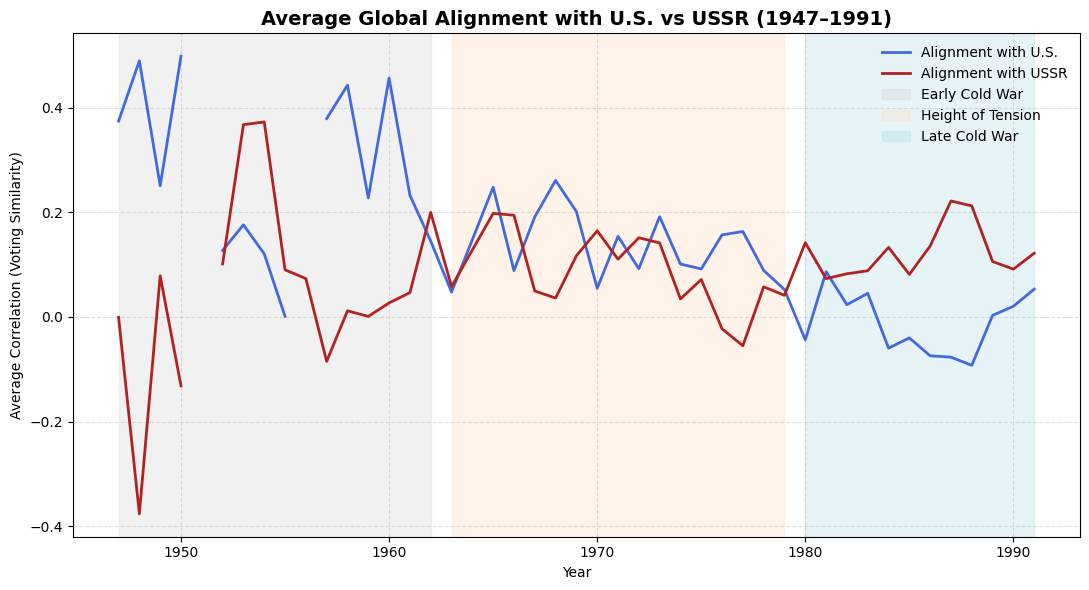

In [153]:
plt.figure(figsize=(11,6))
plt.plot(corr_df['year'], corr_df['US_alignment'], color='royalblue', linewidth=2, label='Alignment with U.S.')
plt.plot(corr_df['year'], corr_df['USSR_alignment'], color='firebrick', linewidth=2, label='Alignment with USSR')

# Context shading
plt.axvspan(1947, 1962, color='lightgrey', alpha=0.3, label='Early Cold War')
plt.axvspan(1963, 1979, color='peachpuff', alpha=0.3, label='Height of Tension')
plt.axvspan(1980, 1991, color='lightblue', alpha=0.3, label='Late Cold War')

plt.title('Average Global Alignment with U.S. vs USSR (1947–1991)', fontsize=14, fontweight='bold')
plt.xlabel('Year'); plt.ylabel('Average Correlation (Voting Similarity)')
plt.grid(True, linestyle='--', alpha=0.4)
plt.legend(frameon=False)
plt.tight_layout(); plt.show()


### Which issues most divided East and West blocs?

In [154]:
# Define representative blocs
western = ['United States','United Kingdom','France','Canada','Australia','Norway','Netherlands']
eastern = ['Russia','Poland','Czechoslovakia','Hungary','Romania','Bulgaria']

polarization = []

for issue, sub in df.groupby('issue'):
    yes_west = sub[sub['country'].isin(western)]['vote'].eq('yes').mean()
    yes_east = sub[sub['country'].isin(eastern)]['vote'].eq('yes').mean()
    gap = abs(yes_west - yes_east)
    polarization.append({'issue': issue, 'west_yes': yes_west, 'east_yes': yes_east, 'gap': gap})

polar_df = pd.DataFrame(polarization).sort_values('gap', ascending=False).head(8)


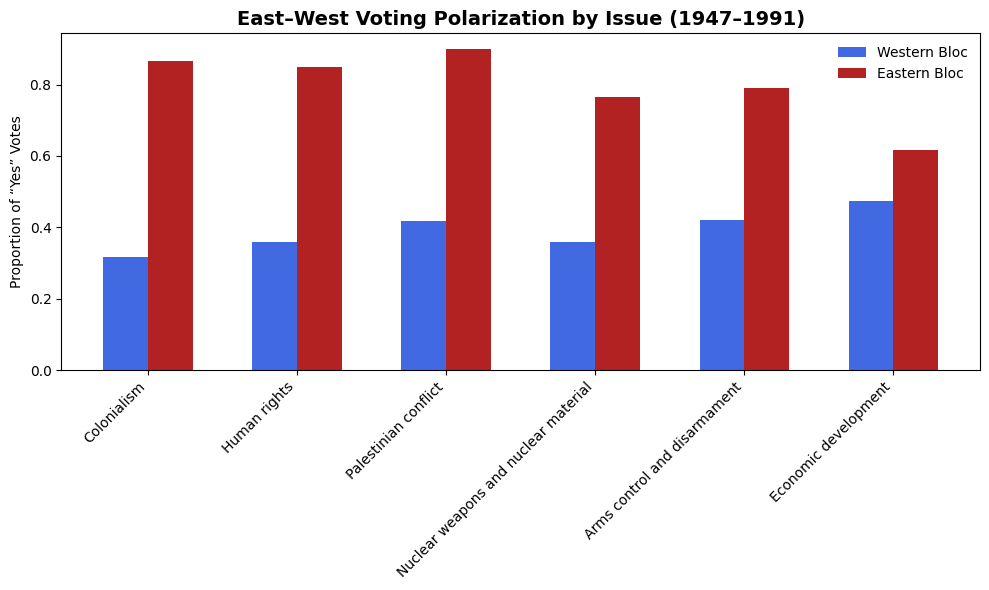

In [155]:
x = np.arange(len(polar_df['issue']))
plt.figure(figsize=(10,6))
plt.bar(x-0.15, polar_df['west_yes'], width=0.3, color='royalblue', label='Western Bloc')
plt.bar(x+0.15, polar_df['east_yes'], width=0.3, color='firebrick', label='Eastern Bloc')
plt.xticks(x, polar_df['issue'], rotation=45, ha='right')
plt.title('East–West Voting Polarization by Issue (1947–1991)', fontsize=14, fontweight='bold')
plt.ylabel('Proportion of “Yes” Votes')
plt.legend(frameon=False)
plt.tight_layout(); plt.show()


### Which countries voted most like the U.S. or USSR?

In [ ]:
# Compute average vote correlations
us_corr = pivot.corrwith(pivot['United States'])
russia_corr = pivot.corrwith(pivot['Russia'])

cluster_df = pd.DataFrame({
    'country': us_corr.index,
    'US_alignment': us_corr.values,
    'Russia_alignment': russia_corr.values
}).dropna()


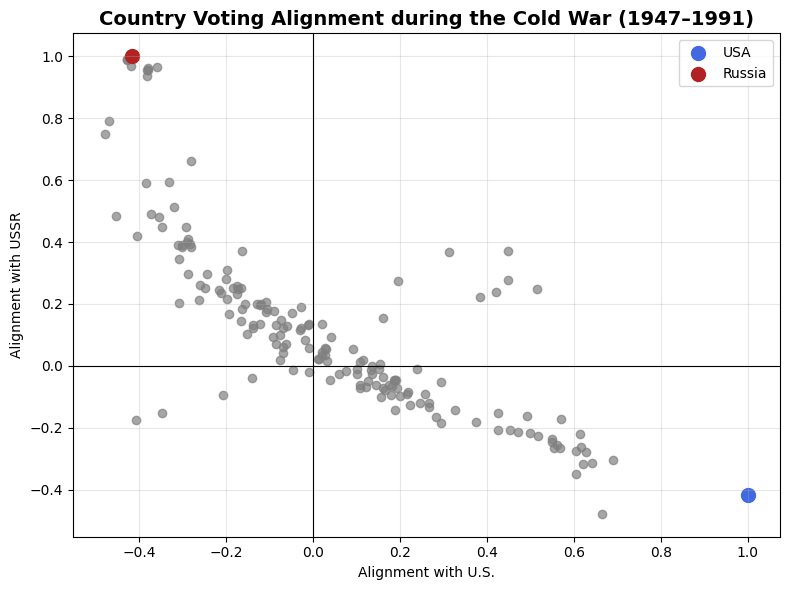

In [159]:
plt.figure(figsize=(8,6))
plt.scatter(cluster_df['US_alignment'], cluster_df['USSR_alignment'], alpha=0.7, color='gray')
plt.scatter(cluster_df.loc[cluster_df['country']=='United States','US_alignment'],
            cluster_df.loc[cluster_df['country']=='United States','USSR_alignment'],
            color='royalblue', s=100, label='USA')
plt.scatter(cluster_df.loc[cluster_df['country']=='Russia','US_alignment'],
            cluster_df.loc[cluster_df['country']=='Russia','USSR_alignment'],
            color='firebrick', s=100, label='Russia')

plt.axhline(0, color='black', lw=0.8)
plt.axvline(0, color='black', lw=0.8)
plt.xlabel('Alignment with U.S.')
plt.ylabel('Alignment with USSR')
plt.title('Country Voting Alignment during the Cold War (1947–1991)', fontsize=14, fontweight='bold')
plt.legend(); plt.grid(True, alpha=0.3)
plt.tight_layout(); plt.show()


Between 1947 and 1991, UN voting patterns clearly mirrored Cold War geopolitics.
The world polarized sharply around U.S. and Soviet positions, peaking during the Korean and Vietnam Wars and easing during détente.
The most divisive issues were disarmament and colonial independence, where ideological contrast was strongest.
Scatter analysis revealed that while two superpower blocs dominated, a third cluster of Non-Aligned nations emerged — balancing global polarization and laying the groundwork for post-Cold War consensus.